In [78]:
import numpy as np
import pandas as pd 

import re

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

from Bio import motifs
from Bio.Seq import Seq


# import plotly.graph_objects as go


In [47]:
df = pd.read_csv('/ebio/abt1_share/prediction_hendecads/0_data/npf_data/stretches_w_groups.csv').drop(columns=['Unnamed: 0'])
df['stretch_ix'] = df['stretch_ix'].apply(lambda x: list(map(int, x.strip('[]').split(','))))

df.head()

,id,seq,stretch_ix,stretch_seq,avg_cc,group_id
0,MCD6041253.1,Mrlvyvavaailcsfsttslagaektakragkfvektatragkfve...,"[1, 71]",rlvyvavaailcsfsttslagaektakragkfvektatragkfver...,0.001041,unassigned
1,MCD7737945.1,MQGRVFFREAAALILAAALSMAGLPASAAANSGIEAAALRTeeete...,"[41, 238]",eeetepstkeavqetavetdtgekpesgedgqeesaesteeeqeed...,0.000364,unassigned
2,MYF28459.1,Merlqtdllkeihalrgemhaefasvrqemhagfasirqemhaeta...,"[1, 73]",erlqtdllkeihalrgemhaefasvrqemhagfasirqemhaetas...,0.001002,unassigned
3,WP_168920948.1,MSDVFLTASYADREKVKTLGARWNPAEKRWYVPSGRDLSPFAAWLP...,"[437, 540]",aqslvveikhaasqqlllarhvvparmaevtaegrqalrtakaqsq...,0.000689,group_42
4,WP_026306873.1,MLLRRIARPLLSAAFIAEGIDILQNPGPLADRLSPALDFTRRRSQH...,"[172, 342]",slgwrgrraardakdhaealaataaaiaatarergtnlvdtarert...,0.000424,group_38


In [48]:
groups = df['group_id'].unique()
group_dict = {group: i for i, group in enumerate(groups)}

df['group_ix'] = df['group_id'].apply(lambda x: group_dict[x])
df

,id,seq,stretch_ix,stretch_seq,avg_cc,group_id,group_ix
0,MCD6041253.1,Mrlvyvavaailcsfsttslagaektakragkfvektatragkfve...,"[1, 71]",rlvyvavaailcsfsttslagaektakragkfvektatragkfver...,0.001041,unassigned,0
1,MCD7737945.1,MQGRVFFREAAALILAAALSMAGLPASAAANSGIEAAALRTeeete...,"[41, 238]",eeetepstkeavqetavetdtgekpesgedgqeesaesteeeqeed...,0.000364,unassigned,0
2,MYF28459.1,Merlqtdllkeihalrgemhaefasvrqemhagfasirqemhaeta...,"[1, 73]",erlqtdllkeihalrgemhaefasvrqemhagfasirqemhaetas...,0.001002,unassigned,0
3,WP_168920948.1,MSDVFLTASYADREKVKTLGARWNPAEKRWYVPSGRDLSPFAAWLP...,"[437, 540]",aqslvveikhaasqqlllarhvvparmaevtaegrqalrtakaqsq...,0.000689,group_42,1
4,WP_026306873.1,MLLRRIARPLLSAAFIAEGIDILQNPGPLADRLSPALDFTRRRSQH...,"[172, 342]",slgwrgrraardakdhaealaataaaiaatarergtnlvdtarert...,0.000424,group_38,2
...,...,...,...,...,...,...,...
40585,XP_034013580.1,MKLNWLLGILPIVAANFDDWSKADLTQFLEDRNVTVQKGDDLVQLA...,"[667, 798]",kdakksgesfaslasksgawyadafysvasesgesaasqalqtgqk...,0.000553,group_106,71
40586,GFR06050.1,MSDVYMDDLLTGADDLESGRKLQEQLVSLLRGAGMELHKWSASNPL...,"[578, 680]",eqrsiseeyekirdyfkdlkiklrekftrfgqwvkgkyergleksk...,0.000696,group_9,59
40587,KAG2190414.1,MSSSILRASIRRNATIANKRFYSAPPPPPYAPNNQGGGNGGLFLGL...,"[65, 170]",gtltkqgevvdqkiqegkqavrdkadeakakyeqskseagqavdqk...,0.000676,unassigned,0
40588,MBY0528383.1,MRVYCSLLASLLTCATIASQPPPLVFNGGTNSLAPRRILAAEKQET...,"[734, 833]",isaltndknrmvrknavdslgffpwdakaivpllvallsdkdsdla...,0.000714,group_1_1,5


## Dictionaries and Utils

In [200]:
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

aa_dict = {'r': '+',
           'h': '+',
           'k': '+',
           'd': '-',
           'e': '-',
           's': 'polar',
           't': 'polar',
           'n': 'polar',
           'q': 'polar',
           'c': 'special',
           'u': 'special',
           'g': 'special',
           'p': 'special',
           'a': 'hydrophobic',
           'v': 'hydrophobic',
           'i': 'hydrophobic',
           'l': 'hydrophobic',
           'm': 'hydrophobic',
           'f': 'hydrophobic',
           'y': 'hydrophobic',
           'w': 'hydrophobic',
           'x': 'padding'}

aa_num_dict = {'r': 0,
               'h': 0,
               'k': 0,
               'd': 1,
               'e': 1,
               's': 2,
               't': 2,
               'n': 2,
               'q': 2,
               'c': 3,
               'u': 3,
               'g': 3,
               'p': 3,
               'a': 4,
               'v': 4,
               'i': 4,
               'l': 4,
               'm': 4,
               'f': 4,
               'y': 4,
               'w': 4,
               'x': 5}

color_dict = {'+': '#00A012',           # green  
              '-': '#D81B60',           # red
              'polar': '#FFC107',       # yellow
              'hydrophobic': '#1E88E5', # blue    
              'special': '#ADADAD',     # grey
              'padding': '#FFFFFF'}     # white 

color_num_dict = {0: '#00A012',           # green
                  1: '#D81B60',           # red
                  2: '#FFC107',           # yellow
                  3: '#1E88E5',           # blue
                  4: '#ADADAD',           # grey
                  5: '#FFFFFF'}           # white

In [50]:
# Letter code and color code for expected hendecad repeat
repeat = ['A', '*', '*', 'D', 'E', '*', '*', 'H', '*', '*', '*']
color_repeat = [color_dict['hydrophobic'], color_dict['special'], color_dict['special'], color_dict['hydrophobic'], color_dict['hydrophobic'], color_dict['special'], color_dict['special'], color_dict['hydrophobic'], color_dict['special'], color_dict['special'], color_dict['special']]

## Visual

In [51]:
def plot_eleven_repeat(seq_id, seq, n_shift=0, save=False):
    seq = seq[n_shift:]
    
    n = len(seq)
    q = n // 11
    r = n % 11

    positions = [repeat[i%11] for i in range(len(seq))]
    colors = [color_dict[aa_dict[aa]] for aa in seq]
    
    # pad last hendecad with padding color
    if n % 11 != 0:
        positions += ['x'] * (11 - r)
        colors += [color_dict['padding']] * (11 - r)
    
    fig, axes = plt.subplots(q+1, 1, figsize=(6, q/3))

    first = True
    for ax in axes:
        
        if first:
            ax.set_title(seq_id) 
            first = False
        
        ax.bar(np.arange(11), np.ones(11), color=colors[:11], edgecolor='black')
        ax.set_yticks([])
        ax.set_xticks([])
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
        colors = colors[11:]
        positions = positions[11:]

    ax.set_xticks(np.arange(11))
    ax.set_xticklabels(repeat)

    legend_elements = [Patch(facecolor=color_dict[aa], edgecolor='black', label=aa) for aa in color_dict.keys()]
    plt.legend(handles=legend_elements, loc='right', bbox_to_anchor=(1.33, q-2))
    
    if save:
        plt.savefig(f'/home/enno/uni/SS23/thesis/seq_analysis/plots/{seq_id}.png', bbox_inches='tight')
        plt.clf()
    else:
        plt.show()

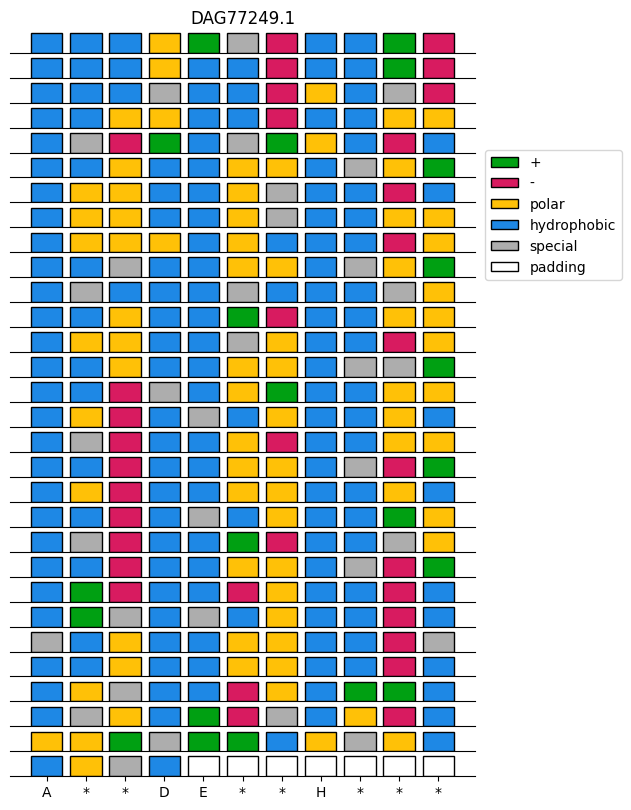

In [52]:
TMP = 'DAG77249.1'
MACH = 'WP_132310275.1'

plot_eleven_repeat(TMP, df[df['id'] == TMP]['stretch_seq'].values[0], n_shift=1)

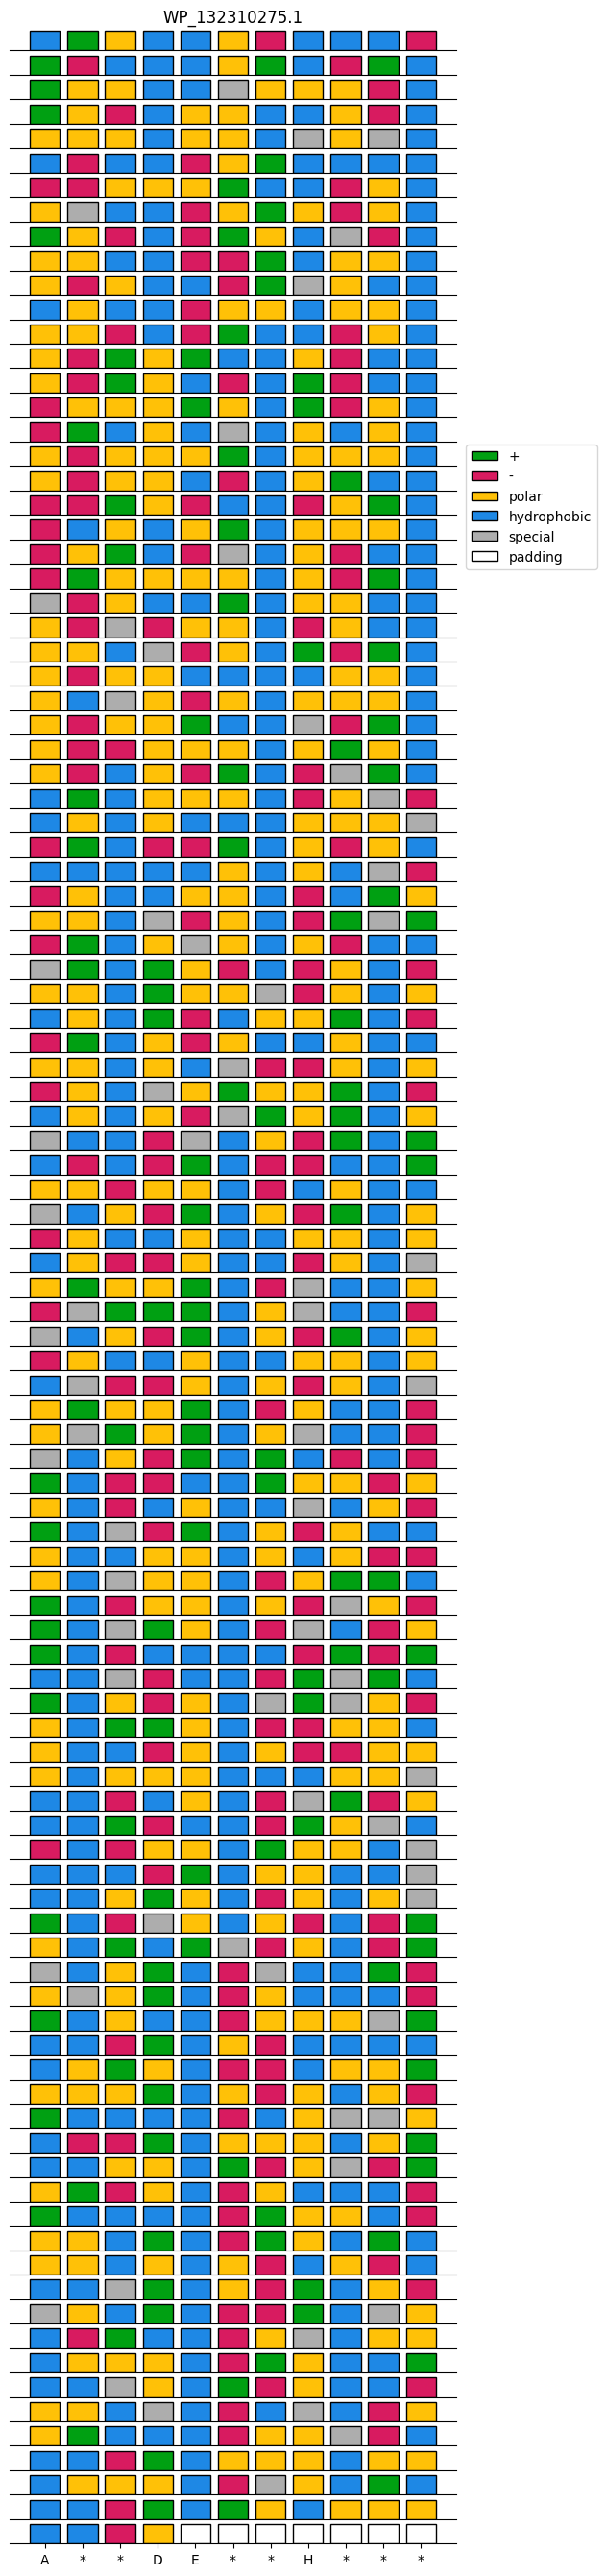

In [53]:
plot_eleven_repeat(MACH, df[df['id'] == MACH]['stretch_seq'].values[0])

## RegEx

In [136]:
def find_repeats(seq, pattern, i, repeat_type='hendecad'):
    # max_s1 is the maximum number of repeats in one reading frame
    # ! searches patterns in all reading frames
    
    pattern = re.compile(pattern)
    
    if repeat_type == 'heptad':
        len_pattern = 7 * i
    elif repeat_type == 'hendecad':
        len_pattern = 11 * i

    matches = pattern.findall(seq)
    matches_ix = [(m.start(1), m.end(1)) for m in pattern.finditer(seq)]
    
    max_n_repeats = sum([len(seq[l:]) // len_pattern for l in range(len_pattern)])
    match_ratio = len(matches) / max_n_repeats if max_n_repeats != 0 else 0

    return len(matches), matches_ix, match_ratio

In [55]:
hendecad_pattern = r'[avilm].{2}[avilm].{3}[avilm].{3}' * 2
hendecad_pattern = r'(?=(' + hendecad_pattern + r'))'

test = 'kaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'
find_repeats(test, hendecad_pattern, 2)

(9,
 [(1, 23),
  (2, 24),
  (3, 25),
  (4, 26),
  (5, 27),
  (6, 28),
  (7, 29),
  (8, 30),
  (9, 31)],
 0.9)

In [56]:
test = 'nnnnnnnnnnnnnnnnnnnn'
find_repeats(test, hendecad_pattern, 1)

(0, [], 0.0)

In [137]:
# 1  2  3  4  5  6  7  8  9 10 11
# a  b  c  d  e  f  g  h  i  j  k 

# pattern = r'[avilm].{6}[avilm].{3}' # detects a------h---

R = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25, 50, 75, 100, 150, 168]


# loop to find increasing number of consecutive hendecad repeats
for n in R:
    
    hendecad_pattern = r'[avilm].{2}[avilm].{3}[avilm].{3}' * n     # detects a--d---h---
    hendecad_pattern = r'(?=(' + hendecad_pattern + r'))'

    heptad_pattern = r'[avilm].{2}[avilm].{3}' * n                  # detects a--d---
    heptad_pattern = r'(?=(' + heptad_pattern + r'))'

    len_pattern = 11 * n

    hendecad_n_hits_out = []
    hendecad_hit_ratio_out = [] 
    hendecad_hits_ix_out = []

    heptad_n_hits_out = []
    heptad_hit_ratio_out = [] 
    heptad_hits_ix_out = []

    for i in range(len(df)):
        n_hits, hits_ix, hit_ratio = find_repeats(df.loc[i, 'stretch_seq'], hendecad_pattern, n)
        hendecad_n_hits_out.append(n_hits)
        hendecad_hits_ix_out.append(hits_ix)
        hendecad_hit_ratio_out.append(hit_ratio)

        n_hits, hits_ix, hit_ratio = find_repeats(df.loc[i, 'stretch_seq'], heptad_pattern, n, repeat_type='heptad')
        heptad_n_hits_out.append(n_hits)
        heptad_hits_ix_out.append(hits_ix)
        heptad_hit_ratio_out.append(hit_ratio)

    df[f'{n}R_hendecad'] = hendecad_n_hits_out
    df[f'{n}R_ratio_hendecad'] = hendecad_hit_ratio_out 
    df[f'{n}R_ix_hendecad'] = hendecad_hits_ix_out

    df[f'{n}R_heptad'] = heptad_n_hits_out
    df[f'{n}R_ratio_heptad'] = heptad_hit_ratio_out 
    df[f'{n}R_ix_heptad'] = heptad_hits_ix_out

In [58]:
# df.to_csv('/home/enno/uni/SS24/thesis/01_data/hendecads/stretches_w_groups_w_repeats.csv')

In [59]:
# ribo_seq = df[df['49R'] > 0].iloc[-1] # https://www.ebi.ac.uk/pdbe/entry/pdb/6xyw/biology

In [85]:
for iR in R:
    tmp_df = df[df[f'{iR}R'] > 0].reset_index(drop=True)

    with open(f'/ebio/abt1_share/prediction_hendecads/0_data/npf_data/xR_fasta/{iR}R.fasta', 'w') as f:
        for i in range(len(tmp_df)):
            f.write(f'>{tmp_df.loc[i, "id"]}_{iR}R\n')
            f.write(f'{tmp_df.loc[i, "seq"]}\n')

### Histograms

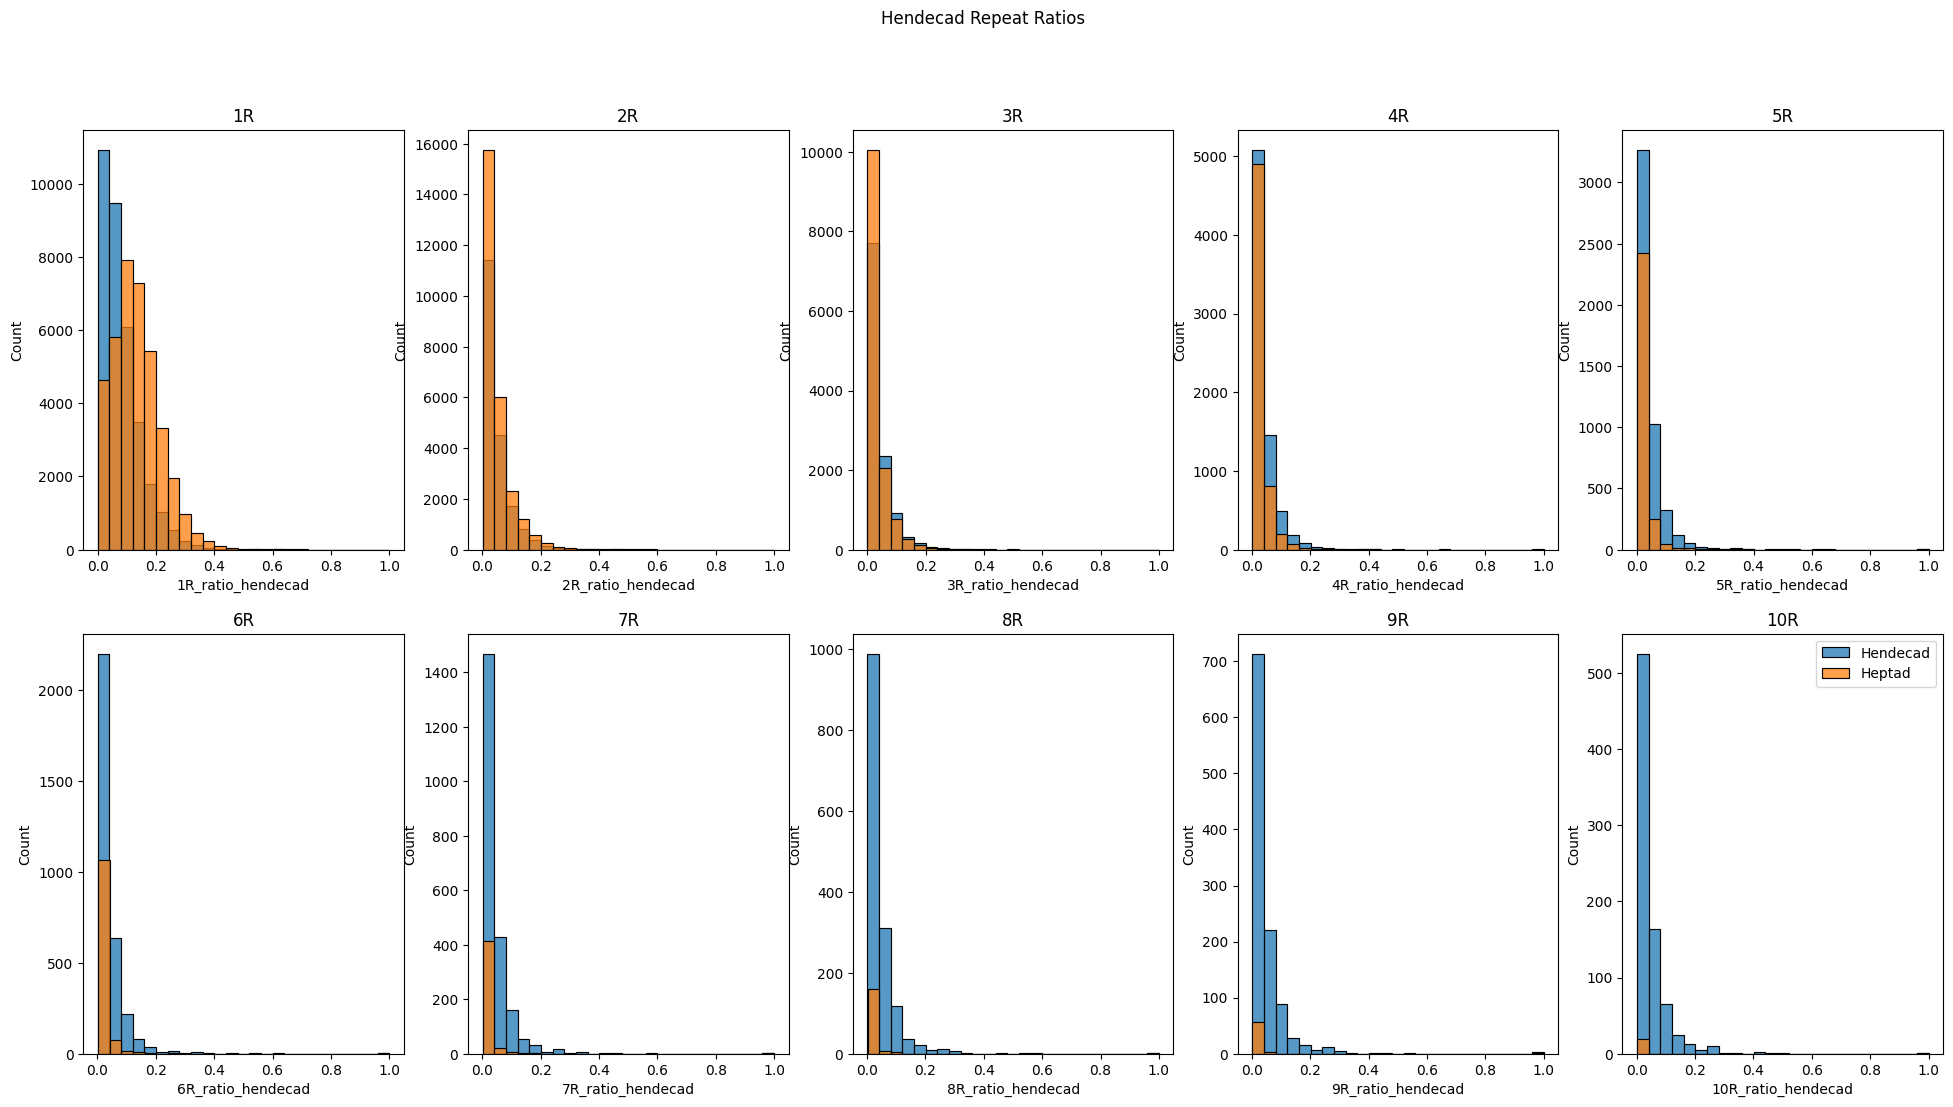

In [147]:
# Plot all xR ratios
fig, ax = plt.subplots(2, 5, figsize=(24, 12))

ix = 0
for i in range(2):
    for j in range(5):
        n = R[ix]
        ix += 1

        sns.histplot(df[df[f'{n}R_ratio_hendecad'] > 0][f'{n}R_ratio_hendecad'], bins=25, ax=ax[i, j], label='Hendecad')
        sns.histplot(df[df[f'{n}R_ratio_heptad'] > 0][f'{n}R_ratio_heptad'], bins=25, ax=ax[i, j], label='Heptad')

        ax[i, j].set_title(f'{n}R')

ax[i, j].legend()
fig.suptitle('Hendecad Repeat Ratios')
plt.show()

In [61]:
df

,id,seq,stretch_ix,stretch_seq,avg_cc,group_id,group_ix,1R,1R_ratio,1R_ix,...,75R_ix,100R,100R_ratio,100R_ix,150R,150R_ratio,150R_ix,168R,168R_ratio,168R_ix
0,MCD6041253.1,Mrlvyvavaailcsfsttslagaektakragkfvektatragkfve...,"[1, 71]",rlvyvavaailcsfsttslagaektakragkfvektatragkfver...,0.001041,unassigned,0,7,0.116667,"[(1, 12), (2, 13), (18, 29), (25, 36), (36, 47...",...,[],0,0.0,[],0,0.0,[],0,0.0,[]
1,MCD7737945.1,MQGRVFFREAAALILAAALSMAGLPASAAANSGIEAAALRTeeete...,"[41, 238]",eeetepstkeavqetavetdtgekpesgedgqeesaesteeeqeed...,0.000364,unassigned,0,0,0.000000,[],...,[],0,0.0,[],0,0.0,[],0,0.0,[]
2,MYF28459.1,Merlqtdllkeihalrgemhaefasvrqemhagfasirqemhaeta...,"[1, 73]",erlqtdllkeihalrgemhaefasvrqemhagfasirqemhaetas...,0.001002,unassigned,0,3,0.048387,"[(10, 21), (50, 61), (57, 68)]",...,[],0,0.0,[],0,0.0,[],0,0.0,[]
3,WP_168920948.1,MSDVFLTASYADREKVKTLGARWNPAEKRWYVPSGRDLSPFAAWLP...,"[437, 540]",aqslvveikhaasqqlllarhvvparmaevtaegrqalrtakaqsq...,0.000689,group_42,1,6,0.064516,"[(0, 11), (4, 15), (15, 26), (24, 35), (48, 59...",...,[],0,0.0,[],0,0.0,[],0,0.0,[]
4,WP_026306873.1,MLLRRIARPLLSAAFIAEGIDILQNPGPLADRLSPALDFTRRRSQH...,"[172, 342]",slgwrgrraardakdhaealaataaaiaatarergtnlvdtarert...,0.000424,group_38,2,15,0.093750,"[(9, 20), (16, 27), (18, 29), (20, 31), (21, 3...",...,[],0,0.0,[],0,0.0,[],0,0.0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40585,XP_034013580.1,MKLNWLLGILPIVAANFDDWSKADLTQFLEDRNVTVQKGDDLVQLA...,"[667, 798]",kdakksgesfaslasksgawyadafysvasesgesaasqalqtgqk...,0.000553,group_106,71,1,0.008264,"[(58, 69)]",...,[],0,0.0,[],0,0.0,[],0,0.0,[]
40586,GFR06050.1,MSDVYMDDLLTGADDLESGRKLQEQLVSLLRGAGMELHKWSASNPL...,"[578, 680]",eqrsiseeyekirdyfkdlkiklrekftrfgqwvkgkyergleksk...,0.000696,group_9,59,2,0.021739,"[(48, 59), (84, 95)]",...,[],0,0.0,[],0,0.0,[],0,0.0,[]
40587,KAG2190414.1,MSSSILRASIRRNATIANKRFYSAPPPPPYAPNNQGGGNGGLFLGL...,"[65, 170]",gtltkqgevvdqkiqegkqavrdkadeakakyeqskseagqavdqk...,0.000676,unassigned,0,0,0.000000,[],...,[],0,0.0,[],0,0.0,[],0,0.0,[]
40588,MBY0528383.1,MRVYCSLLASLLTCATIASQPPPLVFNGGTNSLAPRRILAAEKQET...,"[734, 833]",isaltndknrmvrknavdslgffpwdakaivpllvallsdkdsdla...,0.000714,group_1_1,5,10,0.112360,"[(26, 37), (29, 40), (30, 41), (45, 56), (52, ...",...,[],0,0.0,[],0,0.0,[],0,0.0,[]


### Sankey

In [62]:
values = []

groups_r = []
groups_not_r = []

first = True

for i in R[:10]:
  
    if first:
        r = df[(df[f'{i}R_hendecad'] > 0)]       # where there is at least one pattern match
        not_r = df[(df[f'{i}R_hendecad'] == 0)]  # where there is no pattern match

        groups_r.append(r)

        values.append(len(r))  
        values.append(len(not_r))    
        
        first = False
    else:
        r = df[df[f'{i}R'] > 0]                                 # where there is at least one pattern match
        not_r = df[(df[f'{i-1}R_hendecad'] > 0) & (df[f'{i}R_hendecad'] == 0)]    # where there is a pattern match in the previous iteration but not in the current

        groups_r.append(r)

        values.append(len(r))
        values.append(len(not_r))

In [63]:
labels = [[f'{i}R_hendecad', f'not {i}R_hendecad']for i in R]
labels = [item for sublist in labels for item in sublist]

color = ['#0f6349'] * len(labels)

fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=["All"] + labels,
                color=color,
            ),
            link=dict(
                source=[0, 0, 1, 1, 3, 3, 5],  # , 5, 7, 7, 9, 9, 11, 11, 13, 13, 15, 15, 17, 17],
                target=[1, 2, 3, 4, 5, 6, 7],  # , 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                value=values,
            ),
        )
    ]
)

# i = 0
# for l, v in zip(['All'] + labels, values):
#     print(f'{i} : {l} : {v}')
#     i += 1

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Pie Charts

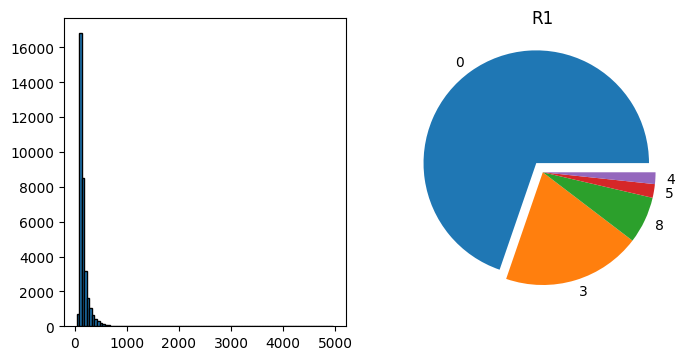

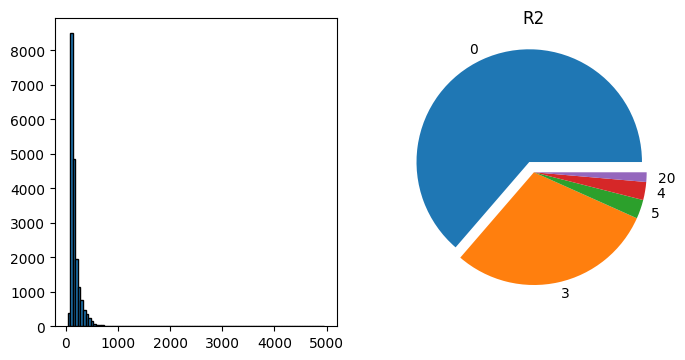

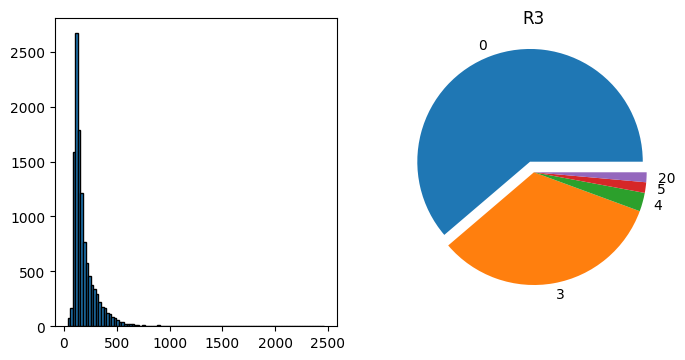

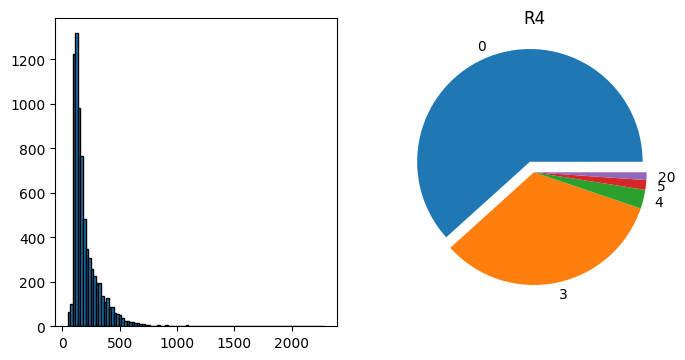

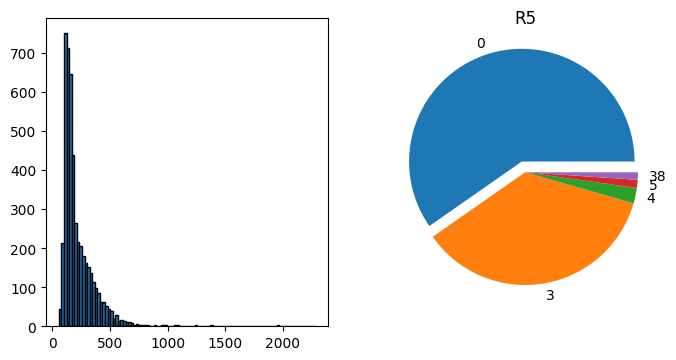

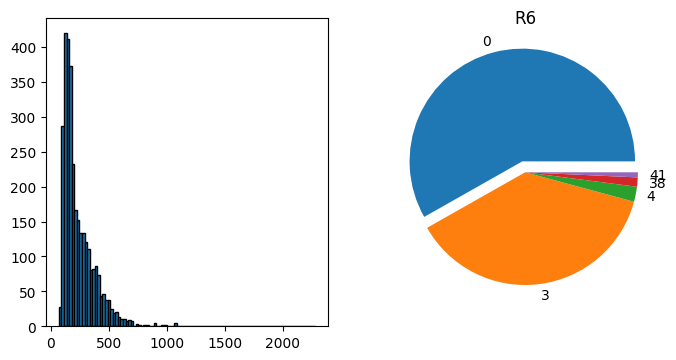

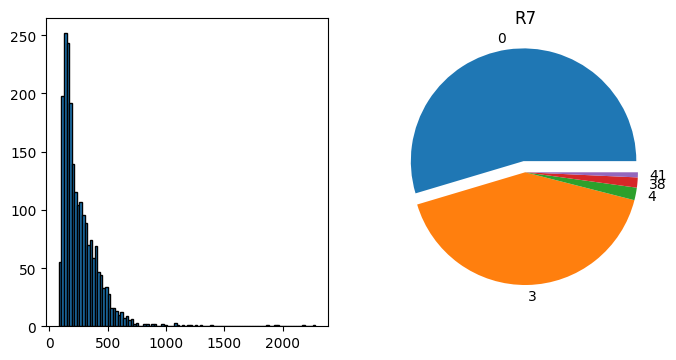

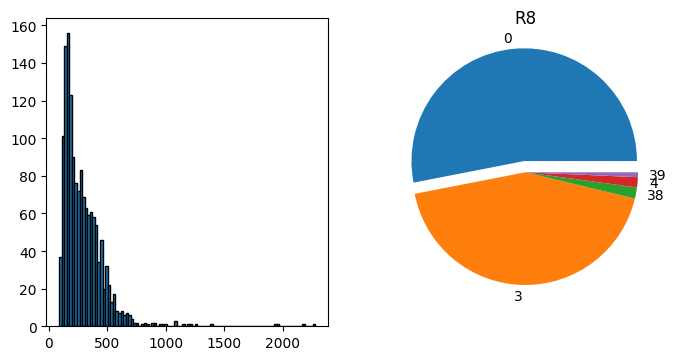

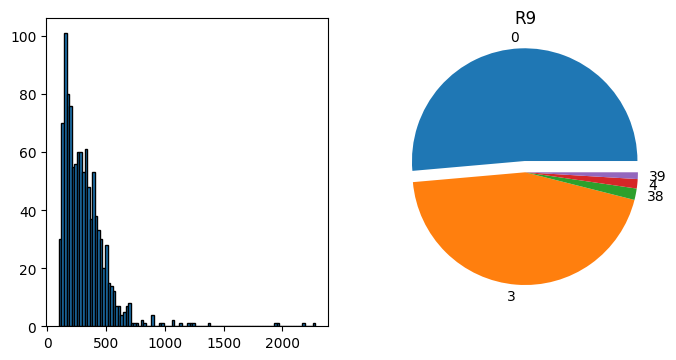

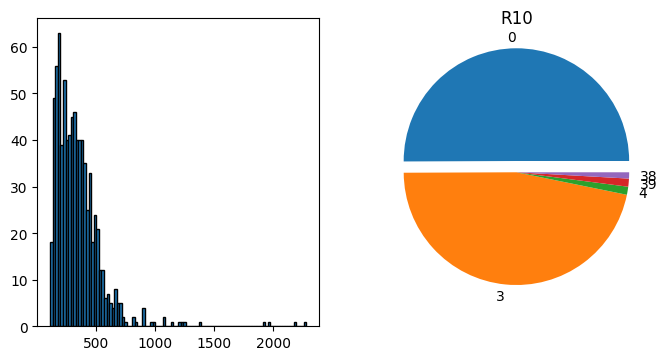

In [188]:
# display all pie charts from groups_r 
top_n = 5

for ix, group in enumerate(groups_r[:10]):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    ax[0].hist(group['stretch_seq'].apply(lambda x: len(x)), bins=100, edgecolor='black')
    ax[1].pie(group['group_ix'].value_counts()[:top_n], labels=group['group_ix'].value_counts().index[:top_n], 
            explode=[0.1] + [0 for _ in range(len(group['group_ix'].unique()) - 1)][:top_n-1])

    plt.title(f'R{ix+1}')
    plt.show()

In [204]:
df[df['168R_hendecad'] > 0].seq.values

array(['MMEHIVVSQIMNHLDDQNILHENQHGFRARRSCESQLILTTDDIVKHLDNKHQVDMAILDFSKAFDKVSHSYLSEKLRYYGIQGSTRRWIDSFLADRFQQVVVDNASSDRTRVTSGVPQGSVLGPTLFLLYINDIANNISSTIRLFADDCVIYRPIRSTEDNLLLQKDLDRLVQWGDTWCMEFNVKKYAIMQFTTTYRKSHYNYHMKGQQLESVQHHPYLGVELSDNMKFNLHINNISKKASSVLGFLKRNLKHCPQKIKERAYLSLVRPKLENASSVWNPQQNTQIKQLEQVQQDGQRPSSHSSDLPPNASTDEKYTTQPYSQVHTIPVPPQYLPAFLlhqnsysleqttrvnryssqlggiqishpagassnsilrsegfeakagvkyieesidkgvnkleveaeagvkqvkesadkgvnkleveaeagvkqvkesadkgvnkleveaeagvkqvkesadkgvnkleveakagvkyieesidkgvnkleveavagmkqieesadkgvnkleveavagmkqieesadkgvnkleveakagvkyieesidkgvnkleveavagmkqieesadkgvnkleveavagmkqieesadkgvnkleveaeagvkqvkesadkgvnkleveaeagvkqvkesadkgvnkleveaeagvkqvkesadkgvnkleveakagvkyieesidkgvnkleveavagmkqieesadkgvnkleveavagmkqieesadkgvnkleveavagmkqieesadkgvnkleveavagmkqieesadkgvnkleveavagmkqieesadkgvnkleveaeagvkqvkesadkgvnkleveavagmkqieesadkgvnkleveaeagvkqvkesadkgvnkleveavagmkqieesadkgvnkleveakagvkyieesidkgvnkleveaeagvkqieesadkgvnkleveakagvkyieesidkgvnkleveaeagvkqvkesadkgvnkleveaeagvkqvkesadkg

### Sequence Motifs for xR

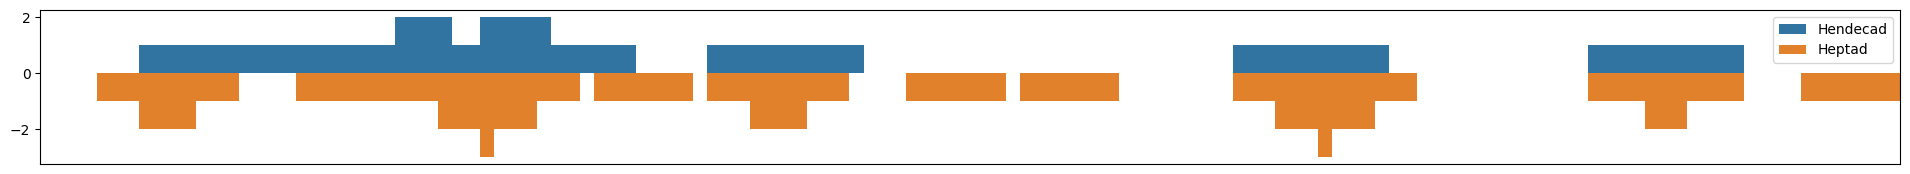

In [199]:
test = df.iloc[32301]
i = 1

len_test = len(test['stretch_seq'])

tmp_hendecad = np.zeros(len_test)
tmp_heptad = np.zeros(len_test)

fig, ax = plt.subplots(figsize=(24, 2))

for ix in test[f'{i}R_ix_hendecad']:
    tmp_hendecad[ix[0]:ix[1]] += 1

for ix in test[f'{i}R_ix_heptad']:
    tmp_heptad[ix[0]:ix[1]] -= 1

sns.barplot(x=np.arange(len_test), y=tmp_hendecad, label='Hendecad', color='#1f77b4', width=1)
sns.barplot(x=np.arange(len_test), y=tmp_heptad, label='Heptad', color='#ff7f0e', width=1)    

plt.xticks([])
plt.legend()
plt.show()


In [77]:
test = df.iloc[40194]
i = 2

len_test = len(test['stretch_seq'])

tmp = np.zeros(len_test)

repeat_seq = [Seq(test['stretch_seq'][ix[0]:ix[1]].upper()) for ix in test[f'{i}R_ix']]

repeat_seq

m = motifs.create(repeat_seq, alphabet=''.join(amino_acids))

motif = ''

M = []
for k, v in m.counts.items():
    M.append(v)

M = np.array(M)
M = M / M.sum(axis=0)

for i in range(M.shape[1]):
    max_aa_value = np.max(M[:, i])
    max_aa_ix = np.argmax(M[:, i])
    max_aa = list(m.counts.keys())[max_aa_ix]

    if max_aa_value > 0.3:
        motif += max_aa
    else:
        motif += '*'

motif

'V**I***I***V**II**VI**'

### CLANS on 10R

In [117]:
tmp_df = df[df['group_id'] == 'unassigned'].reset_index(drop=True)


with open(f'/ebio/abt1_share/prediction_hendecads/0_data/npf_data/xR_fasta/unassigned.fasta', 'w') as f:
    for i in range(len(tmp_df)):
        f.write(f'>{tmp_df.loc[i, "id"]}\n')
        f.write(f'{tmp_df.loc[i, "seq"]}\n')

In [111]:
clans_10r = '/ebio/abt1_share/prediction_hendecads/0_data/npf_data/xR_fasta/10R_large_cluster.txt'

with open(clans_10r, 'r') as f:
    lines = f.readlines()

lines = [line.strip()[:-4] for line in lines]

In [115]:
df[df['id'].isin(lines)]['group_id'].value_counts()

group_0       432
unassigned     13
group_40        3
group_1_4       3
group_131       1
Name: group_id, dtype: int64

## Sequence Properties

In [148]:
# compute amino acid frequency for all groups

repeat_numbers_hendecad = [f'{i}R_ratio_hendecad' for i in R]
repeat_numbers_heptad = [f'{i}R_ratio_heptad' for i in R]

total_aa_freq = {aa: 0 for aa in amino_acids}
total = 0

property_df = pd.DataFrame(columns=['group'] +  
                                    amino_acids +
                                    repeat_numbers_hendecad +
                                    repeat_numbers_heptad +
                                    ['mean_length'])

groups = df['group_id'].unique()
for group in groups:
    group_df = df[df['group_id'] == group].reset_index(drop=True)
    
    aa_freq = {aa: 0 for aa in amino_acids}
    total = 0

    for seq in group_df['stretch_seq']:
        for aa in seq:
            aa_freq[aa.upper()] += 1
            total += 1

    aa_freq = {aa: freq/total for aa, freq in aa_freq.items()}
    
    mean_length = group_df['stretch_seq'].apply(lambda x: len(x)).mean()
    
    r_freq_hendecad = {f'{i}R_ratio_hendecad': group_df[f'{i}R_ratio_hendecad'].mean() for i in R}
    r_freq_heptad = {f'{i}R_ratio_heptad': group_df[f'{i}R_ratio_heptad'].mean() for i in R}
    
    property_df.loc[len(property_df)] = {'group': group, **aa_freq, **r_freq_hendecad, **r_freq_heptad, 'mean_length': mean_length}

In [149]:
property_df.head()

,group,A,C,D,E,F,G,H,I,K,...,8R_ratio_heptad,9R_ratio_heptad,10R_ratio_heptad,25R_ratio_heptad,50R_ratio_heptad,75R_ratio_heptad,100R_ratio_heptad,150R_ratio_heptad,168R_ratio_heptad,mean_length
0,unassigned,0.123723,0.008173,0.059755,0.092798,0.020785,0.066104,0.019502,0.032454,0.070289,...,0.000079,0.000052,0.000043,0.000038,0.000038,0.000038,0.0,0.0,0.0,153.270665
1,group_42,0.121358,0.004806,0.042055,0.069691,0.014419,0.049564,0.026434,0.043557,0.029438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,114.793103
2,group_38,0.246801,0.000000,0.059519,0.085886,0.008918,0.077549,0.019387,0.013765,0.069213,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,161.187500
3,group_0,0.105091,0.001750,0.040017,0.038803,0.047893,0.086149,0.004022,0.109629,0.055793,...,0.000248,0.000067,0.000016,0.000000,0.000000,0.000000,0.0,0.0,0.0,209.047855
4,group_1_0,0.153089,0.001720,0.062651,0.059756,0.031894,0.082124,0.008660,0.060263,0.067587,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,154.844828


<Axes: >

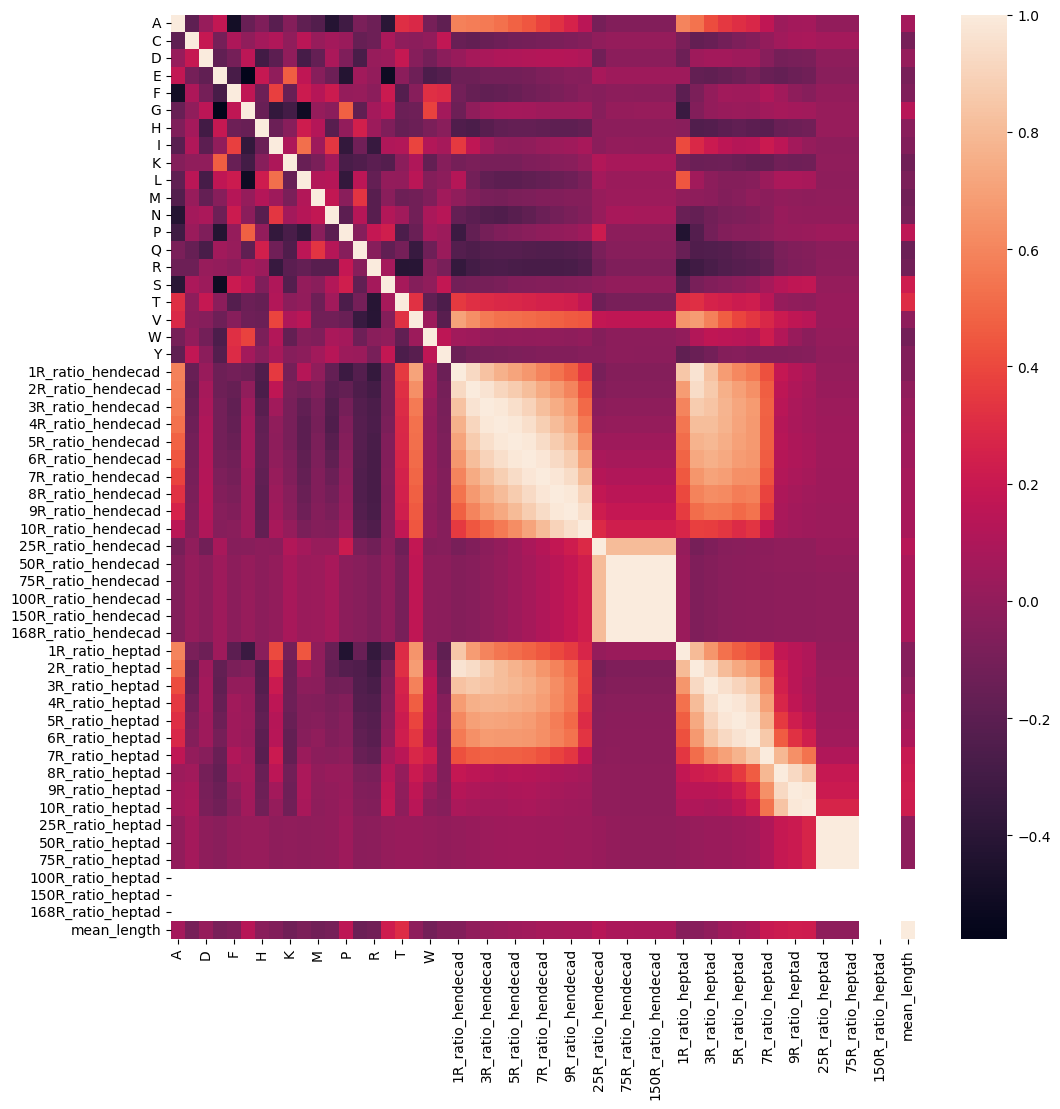

In [151]:
plt.figure(figsize=(12, 12))
sns.heatmap(property_df.drop(columns=['group']).corr())

In [152]:
property_df

,group,A,C,D,E,F,G,H,I,K,...,8R_ratio_heptad,9R_ratio_heptad,10R_ratio_heptad,25R_ratio_heptad,50R_ratio_heptad,75R_ratio_heptad,100R_ratio_heptad,150R_ratio_heptad,168R_ratio_heptad,mean_length
0,unassigned,0.123723,0.008173,0.059755,0.092798,0.020785,0.066104,0.019502,0.032454,0.070289,...,0.000079,0.000052,0.000043,0.000038,0.000038,0.000038,0.0,0.0,0.0,153.270665
1,group_42,0.121358,0.004806,0.042055,0.069691,0.014419,0.049564,0.026434,0.043557,0.029438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,114.793103
2,group_38,0.246801,0.000000,0.059519,0.085886,0.008918,0.077549,0.019387,0.013765,0.069213,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,161.187500
3,group_0,0.105091,0.001750,0.040017,0.038803,0.047893,0.086149,0.004022,0.109629,0.055793,...,0.000248,0.000067,0.000016,0.000000,0.000000,0.000000,0.0,0.0,0.0,209.047855
4,group_1_0,0.153089,0.001720,0.062651,0.059756,0.031894,0.082124,0.008660,0.060263,0.067587,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,154.844828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,group_101,0.096868,0.000000,0.057425,0.078306,0.020882,0.064965,0.009861,0.050464,0.053944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,123.142857
134,group_131,0.178557,0.008866,0.037938,0.051134,0.009691,0.086186,0.001237,0.031959,0.011546,...,0.000298,0.000225,0.000152,0.000000,0.000000,0.000000,0.0,0.0,0.0,303.125000
135,group_83,0.170957,0.003885,0.051481,0.121904,0.007285,0.018941,0.007771,0.061680,0.079165,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,137.266667
136,group_50,0.051245,0.005501,0.085698,0.098147,0.023162,0.027794,0.013897,0.051824,0.075854,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,123.357143


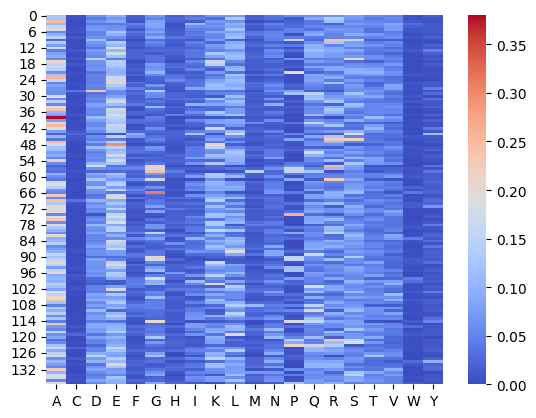

In [72]:
sns.heatmap(property_df[amino_acids], cmap='coolwarm')

plt.show()